In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline


In [36]:
diamond = pd.read_csv('./input/data.csv')


(7, 0)

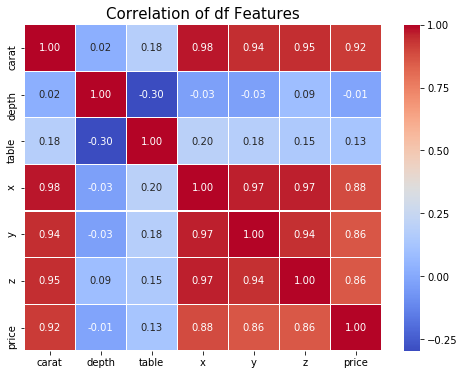

In [37]:
corr = diamond.corr()
plt.figure(figsize = (8,6))
hm=sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30, cmap = "coolwarm")
plt.title('Correlation of df Features', y = 1.05, size=15)
hm.set_ylim(7,0,0)

([<matplotlib.patches.Wedge at 0x1615a1cd0>,
 [Text(-0.673958139799957, 0.869356328439255, ''),
  Text(-1.0447275324110605, -0.3443027490774599, ''),
  Text(-0.13649351387548092, -1.0914987497335598, ''),
  Text(0.8732928438506007, -0.6688494665313943, ''),
  Text(1.072990723667682, 0.24226206249246823, ''),
  Text(0.6592815670216539, 0.8805383667878832, ''),
  Text(0.17985657340428024, 1.0851965780462407, '')],
 [Text(-0.36761353079997655, 0.47419436096686635, '21.0%'),
  Text(-0.5698513813151239, -0.18780149949679628, '18.2%'),
  Text(-0.07445100756844412, -0.5953629544001234, '17.8%'),
  Text(0.47634155119123667, -0.36482698174439687, '15.4%'),
  Text(0.5852676674550991, 0.13214294317770992, '12.5%'),
  Text(0.3596081274663566, 0.4802936546115726, '10.0%'),
  Text(0.09810358549324376, 0.5919254062070404, '5.2%')])

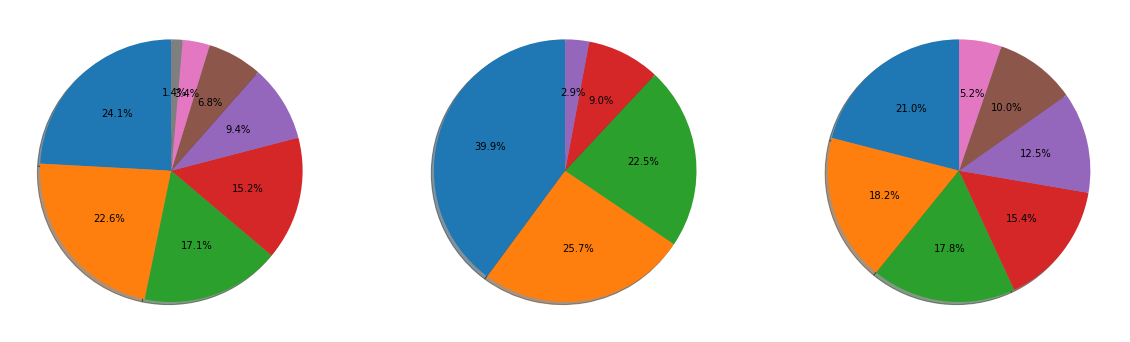

In [38]:
d1 = diamond['clarity'].value_counts()
d2 = diamond['cut'].value_counts()
d3 = diamond['color'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(20,20))
axs[0].pie(d1, autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].pie(d2, autopct='%1.1f%%', shadow=True, startangle=90)
axs[2].pie(d3, autopct='%1.1f%%', shadow=True, startangle=90)



In [39]:
# To categorical
col_dumm = diamond[['cut', 'color', 'clarity']]
d_dum=pd.get_dummies(col_dumm)
diamond = diamond.join(d_dum)

In [40]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831,...,0,0,0,0,0,1,0,0,0,0
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170,...,0,0,0,0,0,1,0,0,0,0
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797,...,0,0,0,0,0,1,0,0,0,0
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630,...,0,0,1,0,0,0,0,0,0,0
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# STANDARD SCALER. Normalized the data by subtracting the mean from each data point and dividing by the std deviation.
columns = ['depth', 'table', 'x', 'y', 'z']
for col in columns:
    diamond[col] = (diamond[col] - np.mean(diamond[col])) / np.std(diamond[col]) 

diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,Ideal,G,SI2,0.106170,-0.205764,2.411028,2.276274,2.339667,12831,...,0,0,0,0,0,1,0,0,0,0
1,2.43,Very Good,H,SI2,1.013798,-0.205764,2.517870,2.397719,2.607386,16170,...,0,0,0,0,0,1,0,0,0,0
2,0.80,Premium,F,SI2,-0.522188,-0.205764,0.265287,0.237737,0.183828,2797,...,0,0,0,0,0,1,0,0,0,0
3,0.40,Ideal,F,I1,1.083616,1.138849,-0.936684,-0.950686,-0.830684,630,...,0,0,1,0,0,0,0,0,0,0
4,0.31,Ideal,G,VS2,-0.103283,-1.102173,-1.194885,-1.184901,-1.182945,698,...,0,0,0,0,0,0,0,1,0,0


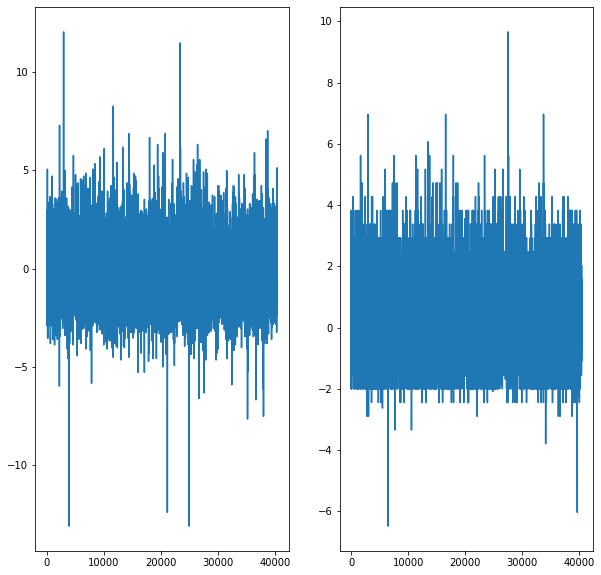

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(diamond['depth'])
axs[1].plot(diamond['table'])

In [43]:
diamond.shape

(40455, 30)

In [44]:
diamond = diamond[(diamond['depth']>=-5 ) & (diamond['depth']<=5)]
diamond = diamond[(diamond['table']>=-5 ) & (diamond['table']<=6)]


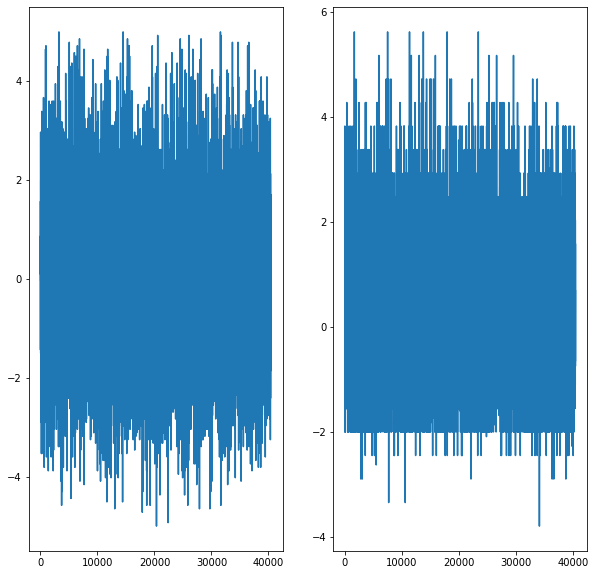

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(diamond['depth'])
axs[1].plot(diamond['table'])

In [46]:
diamond.drop(columns=['cut', 'clarity', 'color', 'x', 'y', 'z'], inplace=True)

In [47]:
diamond.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,0.106170,-0.205764,12831,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.43,1.013798,-0.205764,16170,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.80,-0.522188,-0.205764,2797,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.40,1.083616,1.138849,630,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.31,-0.103283,-1.102173,698,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

In [49]:
y = diamond["price"]
X = diamond.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [50]:
X.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,0.106170,-0.205764,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.43,1.013798,-0.205764,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.80,-0.522188,-0.205764,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.40,1.083616,1.138849,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.31,-0.103283,-1.102173,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:

models = {
    #"svm": LinearSVC(),
    #"logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    "forest": RandomForestRegressor(n_estimators=250),
    "ridge": Ridge(),
    "svr": SVR(C=1.0, epsilon=0.2),
    "GBR": HistGradientBoostingRegressor()
    #"MLPClassifier": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")


Training model: forest
Training finished: forest
Training model: ridge
Training finished: ridge
Training model: svr


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training finished: svr
Training model: GBR
Training finished: GBR


In [52]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}

df = pd.DataFrame(d)
df["gt"] = y_test.reset_index(drop=True)
df.head()

,forest,ridge,svr,GBR,gt
0,2967.936000,3885.571523,2102.906711,2642.674014,2817
1,9147.136000,9798.849786,3245.079163,9159.007141,9108
2,7364.180333,8610.097853,3187.052752,7497.061386,7418
3,4801.071667,5971.929706,2812.053183,5289.085081,4441
4,12819.922800,10521.910009,3181.349444,12262.282496,12308


In [53]:
kf = KFold(n_splits=2, shuffle=True, random_state=11)
for k, v in models.items():
    scores = cross_val_score(v, X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
    name = str(v)
    print(f'{name}: Average R-Squared Score:', np.mean(scores))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False): Average R-Squared Score: 0.9782319827719044
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001): Average R-Squared Score: 0.9170279205295069
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False): Average R-Squared Score: -0.052992020070050994
HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmseGBR = sqrt(mean_squared_error(y_test, d['GBR']))
rmseForest = sqrt(mean_squared_error(y_test, d['forest']))
print(f"forest: {rmseForest}, GBR: {rmseGBR}")

forest: 565.0134316302501, GBR: 562.3599297339633


## CAMBIANDO EL TEST

In [55]:
test_diamond = pd.read_csv('./input/test.csv')


In [56]:
test_diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.56,Ideal,I,VS2,62.1,54.0,5.30,5.33,3.30
1,1,1.05,Ideal,G,VS2,61.9,56.0,6.56,6.52,4.05
2,2,0.50,Premium,E,VS2,61.5,56.0,5.11,5.07,3.13
3,3,0.80,Ideal,F,VS1,62.8,56.0,5.91,5.96,3.73
4,4,0.54,Ideal,G,VS1,61.4,57.0,5.23,5.20,3.20


In [57]:
col_dumm = test_diamond[['cut', 'color', 'clarity']]
d_dum=pd.get_dummies(col_dumm)
test_diamond = test_diamond.join(d_dum)

In [58]:
test_diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.56,Ideal,I,VS2,62.1,54.0,5.30,5.33,3.30,...,1,0,0,0,0,0,0,1,0,0
1,1,1.05,Ideal,G,VS2,61.9,56.0,6.56,6.52,4.05,...,0,0,0,0,0,0,0,1,0,0
2,2,0.50,Premium,E,VS2,61.5,56.0,5.11,5.07,3.13,...,0,0,0,0,0,0,0,1,0,0
3,3,0.80,Ideal,F,VS1,62.8,56.0,5.91,5.96,3.73,...,0,0,0,0,0,0,1,0,0,0
4,4,0.54,Ideal,G,VS1,61.4,57.0,5.23,5.20,3.20,...,0,0,0,0,0,0,1,0,0,0


In [59]:
columns = ['depth', 'table', 'x', 'y', 'z']
for col in columns:
    test_diamond[col] = (test_diamond[col] - np.mean(test_diamond[col])) / np.std(test_diamond[col]) 

test_diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.56,Ideal,I,VS2,0.241489,-1.537773,-0.383443,-0.360777,-0.340759,...,1,0,0,0,0,0,0,1,0,0
1,1,1.05,Ideal,G,VS2,0.101972,-0.646693,0.744052,0.711770,0.740676,...,0,0,0,0,0,0,0,1,0,0
2,2,0.50,Premium,E,VS2,-0.177064,-0.646693,-0.553462,-0.595116,-0.585884,...,0,0,0,0,0,0,0,1,0,0
3,3,0.80,Ideal,F,VS1,0.729801,-0.646693,0.162408,0.207042,0.279264,...,0,0,0,0,0,0,1,0,0,0
4,4,0.54,Ideal,G,VS1,-0.246823,-0.201152,-0.446082,-0.477947,-0.484950,...,0,0,0,0,0,0,1,0,0,0


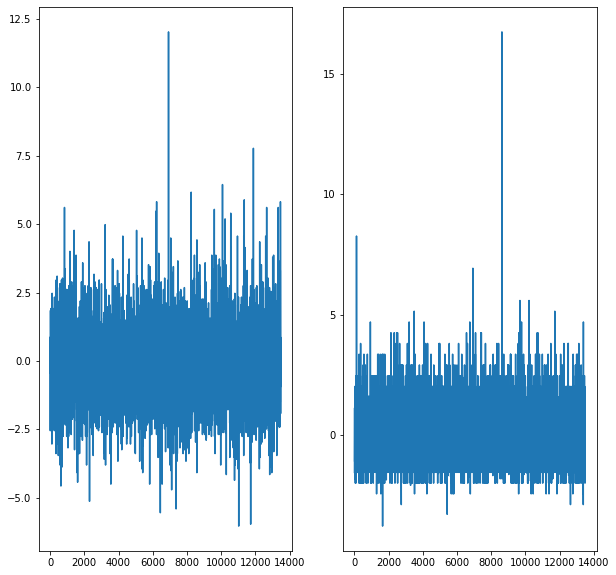

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(test_diamond['depth'])
axs[1].plot(test_diamond['table'])

In [61]:
test_diamond.drop(columns=['cut', 'color', 'clarity', "x", "y", "z"], inplace=True)

In [62]:
test_diamond.head(10)

,id,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.56,0.241489,-1.537773,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,1.05,0.101972,-0.646693,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0.50,-0.177064,-0.646693,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0.80,0.729801,-0.646693,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.54,-0.246823,-0.201152,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,5,2.25,-0.246823,-1.537773,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,6,0.33,0.729801,-0.201152,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,7,0.32,0.032213,0.244388,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,8,0.30,-0.246823,1.135469,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,9,2.10,0.869319,-0.646693,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [65]:
d1 = {modelName:model.predict(test_diamond.drop(columns=['id'])) for modelName, model in models.items()}

df1 = pd.DataFrame(d1)
df1['id']=test_diamond['id']
new = df1[['id','GBR']]
new.rename(columns={"GBR": "price"}, inplace=True)
new.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,id,price
0,0,1520.204342
1,1,6636.189829
2,2,1567.472393
3,3,3831.980249
4,4,1775.235938


In [66]:
new.to_csv('pruebaGBRXYZ.csv', index=False)
